# Handwritten Letter Recognition: EMNIST Deep Learning Benchmarking

This notebook explores and benchmarks various deep learning architectures for the task of handwritten letter classification using the EMNIST dataset, a modern and challenging variant of the classic MNIST. Both fully-connected neural networks (FCN) and convolutional neural networks (CNN) are implemented and compared using standardized preprocessing, robust validation, and comprehensive performance metrics.

**Highlights:**
- End-to-end workflow from data ingestion and preprocessing to model design, training, and evaluation.
- Systematic comparison of architectural choices, including FCN, shallow CNN, and deeper custom CNN variants.

This project demonstrates practical deep learning skills and problem-solving on a realistic image classification challenge.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!ls /content/drive/My Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ls: cannot access '/content/drive/My': No such file or directory
ls: cannot access 'Drive': No such file or directory


In [ ]:
import gzip
import numpy as np

def load_images(path):
    with gzip.open(path, 'rb') as f:

        f.read(16)
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(-1, 28, 28)
    return images

train_images_path = '/content/drive/My Drive/gzip/gzip/emnist-letters-train-images-idx3-ubyte.gz'
test_images_path = '/content/drive/My Drive/gzip/gzip/emnist-letters-test-images-idx3-ubyte.gz'

train_images = load_images(train_images_path)
test_images = load_images(test_images_path)

print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)


Train images shape: (124800, 28, 28)
Test images shape: (20800, 28, 28)


In [ ]:
def load_labels(path):
    with gzip.open(path, 'rb') as f:

        f.read(8)
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

train_labels_path = '/content/drive/My Drive/gzip/gzip/emnist-letters-train-labels-idx1-ubyte.gz'
test_labels_path = '/content/drive/My Drive/gzip/gzip/emnist-letters-test-labels-idx1-ubyte.gz'

train_labels = load_labels(train_labels_path)
test_labels = load_labels(test_labels_path)

print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)


Train labels shape: (124800,)
Test labels shape: (20800,)


In [ ]:

valid_indices_train = train_labels <= 25
valid_indices_test = test_labels <= 25

train_images_filtered = train_images[valid_indices_train]
train_labels_filtered = train_labels[valid_indices_train] - 1

test_images_filtered = test_images[valid_indices_test]
test_labels_filtered = test_labels[valid_indices_test] - 1


print("Filtered train images shape:", train_images_filtered.shape)
print("Filtered train labels shape:", train_labels_filtered.shape)
print("Filtered test images shape:", test_images_filtered.shape)
print("Filtered test labels shape:", test_labels_filtered.shape)


Filtered train images shape: (120000, 28, 28)
Filtered train labels shape: (120000,)
Filtered test images shape: (20000, 28, 28)
Filtered test labels shape: (20000,)


In [ ]:
x_train_flat = train_images_filtered.reshape(-1, 28 * 28)
x_test_flat = test_images_filtered.reshape(-1, 28 * 28)

print("Flattened train features shape:", x_train_flat.shape)
print("Flattened test features shape:", x_test_flat.shape)


Flattened train features shape: (120000, 784)
Flattened test features shape: (20000, 784)


In [ ]:
x_train_cnn = train_images_filtered.reshape(-1, 28, 28, 1)
x_test_cnn = test_images_filtered.reshape(-1, 28, 28, 1)

print("Reshaped train features shape:", x_train_cnn.shape)
print("Reshaped test features shape:", x_test_cnn.shape)


Reshaped train features shape: (120000, 28, 28, 1)
Reshaped test features shape: (20000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

def build_fc_dnn():
    model = Sequential([
        Input(shape=(28 * 28,)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(25, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

fc_dnn_model = build_fc_dnn()
fc_dnn_model.fit(
    x_train_flat, train_labels_filtered,
    epochs=10, batch_size=64,
    validation_data=(x_test_flat, test_labels_filtered)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.3220 - loss: 4.9357 - val_accuracy: 0.7232 - val_loss: 0.9857
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7629 - loss: 0.8175 - val_accuracy: 0.8234 - val_loss: 0.6050
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8373 - loss: 0.5315 - val_accuracy: 0.8445 - val_loss: 0.5116
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8601 - loss: 0.4459 - val_accuracy: 0.8656 - val_loss: 0.4399
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8760 - loss: 0.3906 - val_accuracy: 0.8661 - val_loss: 0.4370
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8887 - loss: 0.3460 - val_accuracy: 0.8751 - val_loss: 0.4155
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8951 - loss: 0.3263 - val_accuracy: 0.8775 - val_loss: 0.4097
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8997 - loss: 0

In [ ]:

print("Number of train samples:", x_train_flat.shape[0])
print("Number of train labels:", train_labels_filtered.shape[0])
print("Number of test samples:", x_test_flat.shape[0])
print("Number of test labels:", test_labels_filtered.shape[0])


print("Unique train labels:", np.unique(train_labels_filtered))
print("Unique test labels:", np.unique(test_labels_filtered))


Number of train samples: 120000
Number of train labels: 120000
Number of test samples: 20000
Number of test labels: 20000
Unique train labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Unique test labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(25, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


cnn_model = build_cnn()
cnn_model.fit(
    x_train_cnn, train_labels_filtered,
    epochs=10, batch_size=64,
    validation_data=(x_test_cnn, test_labels_filtered)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 111s 59ms/step - accuracy: 0.3659 - loss: 2.8318 - val_accuracy: 0.8896 - val_loss: 0.3522
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 107s 57ms/step - accuracy: 0.8170 - loss: 0.5756 - val_accuracy: 0.9096 - val_loss: 0.2784
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 56ms/step - accuracy: 0.8632 - loss: 0.4294 - val_accuracy: 0.9216 - val_loss: 0.2465
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 57ms/step - accuracy: 0.8830 - loss: 0.3670 - val_accuracy: 0.9201 - val_loss: 0.2420
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 59ms/step - accuracy: 0.8939 - loss: 0.3269 - val_accuracy: 0.9281 - val_loss: 0.2269
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 59ms/step - accuracy: 0.9007 - loss: 0.3069 - val_accuracy: 0.9291 - val_loss: 0.2204
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 136s 56ms/step - accuracy: 0.9054 - loss: 0.2870 - val_accuracy: 0.9308 - val_loss: 0.2221
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 56ms/step - accuracy: 

In [ ]:
def build_deeper_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(25, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


deeper_cnn_model = build_deeper_cnn()
deeper_cnn_model.fit(
    x_train_cnn, train_labels_filtered,
    epochs=15, batch_size=32,
    validation_data=(x_test_cnn, test_labels_filtered)
)


Epoch 1/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 135s 35ms/step - accuracy: 0.6311 - loss: 1.4149 - val_accuracy: 0.8690 - val_loss: 0.3891
Epoch 2/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 144s 36ms/step - accuracy: 0.8559 - loss: 0.4494 - val_accuracy: 0.8870 - val_loss: 0.3437
Epoch 3/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 138s 35ms/step - accuracy: 0.8750 - loss: 0.3811 - val_accuracy: 0.8849 - val_loss: 0.3426
Epoch 4/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 145s 36ms/step - accuracy: 0.8858 - loss: 0.3524 - val_accuracy: 0.8924 - val_loss: 0.3262
Epoch 5/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 137s 34ms/step - accuracy: 0.8904 - loss: 0.3357 - val_accuracy: 0.8905 - val_loss: 0.3367
Epoch 6/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 129s 34ms/step - accuracy: 0.8959 - loss: 0.3174 - val_accuracy: 0.8882 - val_loss: 0.3485
Epoch 7/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 142s 34ms/step - accuracy: 0.8977 - loss: 0.3095 - val_accuracy: 0.8956 - val_loss: 0.3192
Epoch 8/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 145s 35ms/step - accuracy: 

In [ ]:
import pandas as pd

def compare_models(models, validation_data, model_names, input_formats):
    """
    Compare models based on validation accuracy and loss.
    Args:
        models (list): List of trained models.
        validation_data (tuple): Tuple (x_test, y_test) for evaluation.
        model_names (list): List of model names.
        input_formats (list): Expected input formats for each model (e.g., "flat" or "cnn").
    Returns:
        DataFrame: Performance comparison table.
    """
    results = []


    x_test, y_test = validation_data


    for model, name, input_format in zip(models, model_names, input_formats):
        print(f"Evaluating {name}...")


        if input_format == "flat":
            x_test_input = x_test.reshape(-1, 28 * 28)
        elif input_format == "cnn":
            x_test_input = x_test.reshape(-1, 28, 28, 1)


        loss, accuracy = model.evaluate(x_test_input, y_test, verbose=0)
        results.append({'Model': name, 'Validation Accuracy': accuracy, 'Validation Loss': loss})


    comparison_df = pd.DataFrame(results)
    print("\nModel Performance Comparison:")
    print(comparison_df)


    best_model = comparison_df.loc[comparison_df['Validation Accuracy'].idxmax()]
    print(f"\nBest Model: {best_model['Model']} with Accuracy: {best_model['Validation Accuracy']:.4f}")

    return comparison_df


models = [fc_dnn_model, cnn_model, deeper_cnn_model]
model_names = ["Fully-Connected DNN", "CNN", "Deeper CNN"]
input_formats = ["flat", "cnn", "cnn"]


validation_data = (test_images_filtered, test_labels_filtered)


comparison_df = compare_models(models, validation_data, model_names, input_formats)


Evaluating Fully-Connected DNN...
Evaluating CNN...
Evaluating Deeper CNN...

Model Performance Comparison:
                 Model  Validation Accuracy  Validation Loss
0  Fully-Connected DNN              0.88375         0.403084
1                  CNN              0.93035         0.220540
2           Deeper CNN              0.89775         0.375778

Best Model: CNN with Accuracy: 0.9304


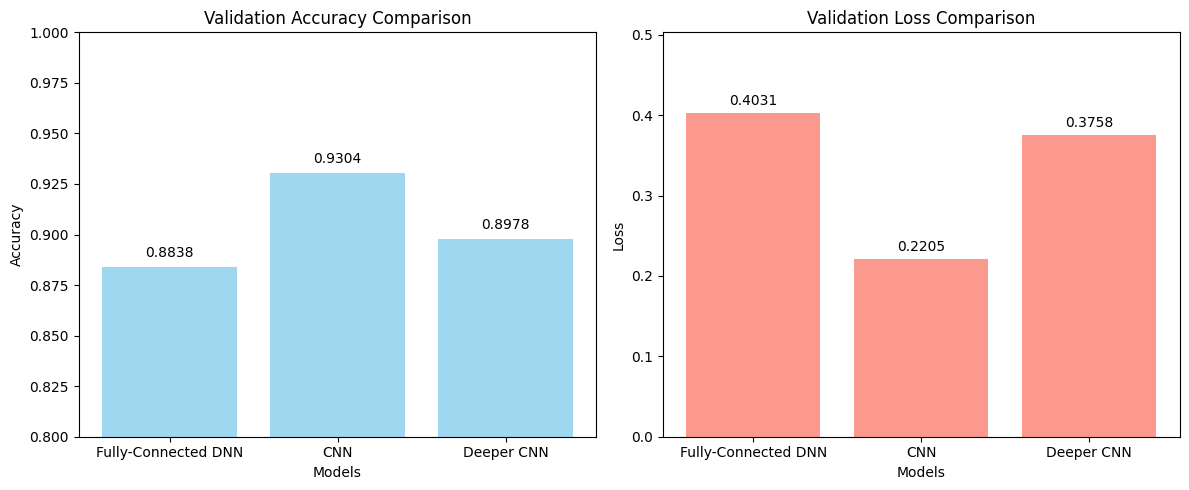

In [ ]:
import matplotlib.pyplot as plt

def visualize_results(comparison_df):
    """
    Visualize model performance using bar charts.
    Args:
        comparison_df (DataFrame): The table of model performance metrics.
    """

    models = comparison_df['Model']
    accuracy = comparison_df['Validation Accuracy']
    loss = comparison_df['Validation Loss']


    fig, axes = plt.subplots(1, 2, figsize=(12, 5))


    axes[0].bar(models, accuracy, color='skyblue', alpha=0.8)
    axes[0].set_title('Validation Accuracy Comparison')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Models')
    axes[0].set_ylim([0.8, 1])
    for i, acc in enumerate(accuracy):
        axes[0].text(i, acc + 0.005, f"{acc:.4f}", ha='center', fontsize=10)


    axes[1].bar(models, loss, color='salmon', alpha=0.8)
    axes[1].set_title('Validation Loss Comparison')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Models')
    axes[1].set_ylim([0, max(loss) + 0.1])
    for i, l in enumerate(loss):
        axes[1].text(i, l + 0.01, f"{l:.4f}", ha='center', fontsize=10)


    plt.tight_layout()
    plt.show()


visualize_results(comparison_df)
